In [159]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
import seaborn as sns

In [160]:
players = pd.read_csv('players.csv', index_col=0)

In [161]:
players.head()

,ID,Age,Distance X,Distance Y
0,0,60,0.976263,21.655952
1,1,34,6.174774,10.937657
2,2,37,-19.041299,5.536271
3,3,68,4.899784,-8.200124
4,4,46,-19.032123,-3.346881


In [162]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Distance X  1000 non-null   float64
 3   Distance Y  1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 39.1 KB


In [163]:
players.describe()

,ID,Age,Distance X,Distance Y
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,47.555000,-0.112058,-0.338178
std,288.819436,17.978214,12.868379,12.685099
min,0.000000,18.000000,-39.546455,-39.076308
25%,249.750000,32.000000,-9.134154,-9.395742
50%,499.500000,47.000000,-0.170264,-0.364127
75%,749.250000,63.000000,9.284641,8.922113
max,999.000000,79.000000,39.617838,39.912491


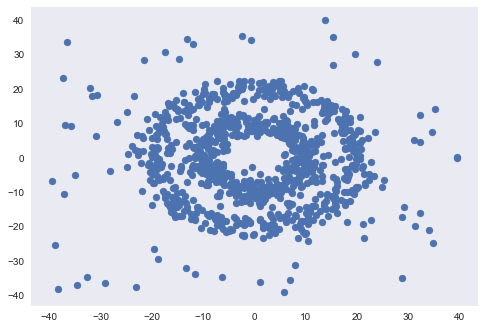

In [164]:
plt.scatter(players['Distance X'], players['Distance Y'])

In [165]:
#Transforming coordinate system into distance in KM from players location to the headquaters.
players['Distance in KM'] = np.sqrt((players['Distance X']**2) + (players['Distance Y']**2))

In [166]:
players.head()

,ID,Age,Distance X,Distance Y,Distance in KM
0,0,60,0.976263,21.655952,21.677946
1,1,34,6.174774,10.937657,12.560262
2,2,37,-19.041299,5.536271,19.829810
3,3,68,4.899784,-8.200124,9.552482
4,4,46,-19.032123,-3.346881,19.324164


In [167]:
#Dropping unneeded columns.
players_clean = players.drop(columns=['Distance X','Distance Y'])

In [168]:
players_clean.describe()

,ID,Age,Distance in KM
count,1000.000000,1000.000000,1000.000000
mean,499.500000,47.555000,16.465500
std,288.819436,17.978214,7.433028
min,0.000000,18.000000,2.692756
25%,249.750000,32.000000,10.334073
50%,499.500000,47.000000,17.205567
75%,749.250000,63.000000,20.519619
max,999.000000,79.000000,54.016718


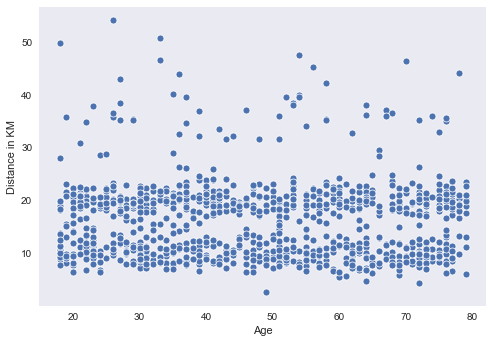

In [170]:
#Chcecking the data distribution.
sns.scatterplot(players_clean['Age'], players_clean['Distance in KM'])

(array([519., 481.]), array([18. , 48.5, 79. ]), <a list of 2 Patch objects>)

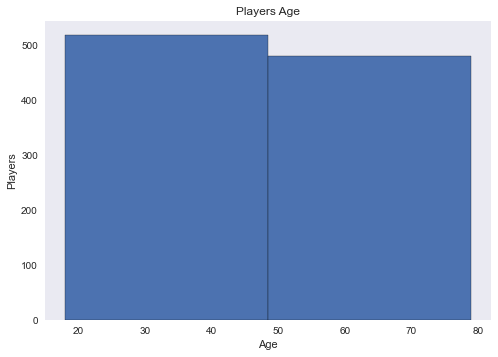

In [171]:
#Binning the age of the players to see the distribution more clearly 
plt.title('Players Age')
plt.xlabel('Age')
plt.ylabel('Players')
plt.hist(players_clean['Age'], bins=2, edgecolor='black')

In [172]:
# Introducing new column to divide players into two distinguish age groups.
players_clean["Age Group Description"] = pd.cut(players_clean['Age'], [0, 48, 80], right=False, labels=["Under 48y", "After 48y"])
players_clean["Age Group Description"].value_counts()

Under 48y    504
After 48y    496
Name: Age Group Description, dtype: int64

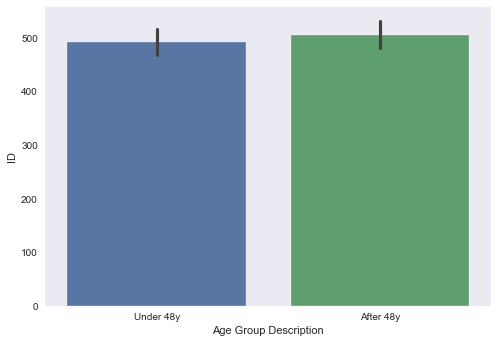

In [183]:
sns.barplot(x="Age Group Description", y="ID", data=players_clean)

In [173]:
# Introducing new column to divide players into two distinguish groups based on distance to headquarters.
players_clean["Distance Description"] = pd.cut(players_clean['Distance in KM'], [0, 16.47, 60], right=False, labels=["Under 16.5km", "Over 16.5km"])
players_clean["Distance Description"].value_counts()

Over 16.5km     517
Under 16.5km    483
Name: Distance Description, dtype: int64

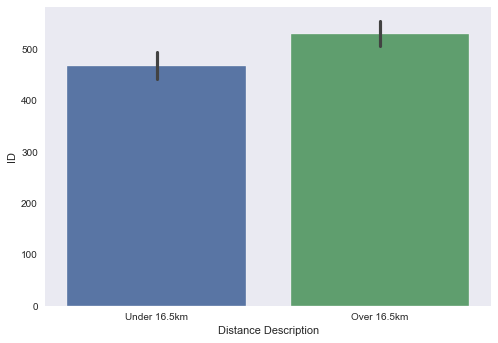

In [182]:
sns.barplot(x="Distance Description", y="ID", data=players_clean)

In [175]:
players_clean.head()

,ID,Age,Distance in KM,Age Group Description,Distance Description
0,0,60,21.677946,After 48y,Over 16.5km
1,1,34,12.560262,Under 48y,Under 16.5km
2,2,37,19.829810,Under 48y,Over 16.5km
3,3,68,9.552482,After 48y,Under 16.5km
4,4,46,19.324164,Under 48y,Over 16.5km


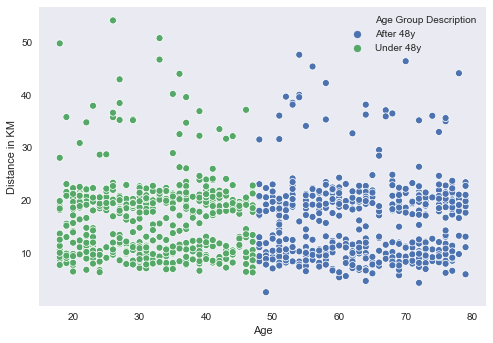

In [177]:
#Chcecking the data distribution with new age description column.
sns.scatterplot(players_clean['Age'], players_clean['Distance in KM'], 
                hue=players_clean["Age Group Description"])

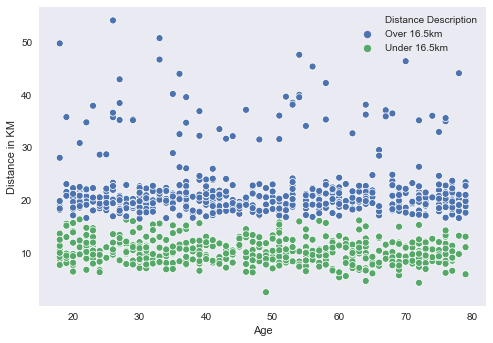

In [176]:
#Chcecking the data distribution with new distance description column.
sns.scatterplot(players_clean['Age'], players_clean['Distance in KM'], 
                hue=players_clean["Distance Description"])

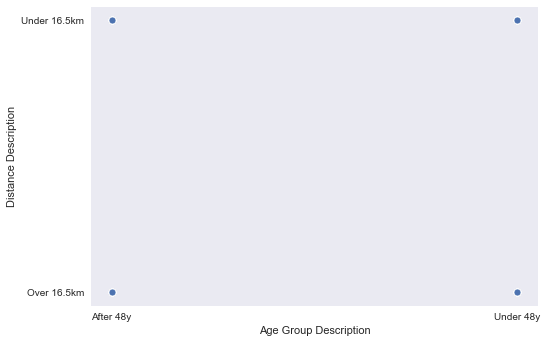

In [178]:
#Chcecking the data distribution for newly created distinct player categories.
sns.scatterplot(players_clean["Age Group Description"], players_clean["Distance Description"])

In [179]:
# Introducing final column with player categorization based on age and distance from the headquaters.
players_clean["Player Category"] = players_clean["Age Group Description"].astype(str) + ' & ' + players_clean["Distance Description"].astype(str)
players_clean["Player Category"].value_counts()

Under 48y & Over 16.5km     264
After 48y & Over 16.5km     253
After 48y & Under 16.5km    243
Under 48y & Under 16.5km    240
Name: Player Category, dtype: int64

In [180]:
players_clean.head()

,ID,Age,Distance in KM,Age Group Description,Distance Description,Player Category
0,0,60,21.677946,After 48y,Over 16.5km,After 48y & Over 16.5km
1,1,34,12.560262,Under 48y,Under 16.5km,Under 48y & Under 16.5km
2,2,37,19.829810,Under 48y,Over 16.5km,Under 48y & Over 16.5km
3,3,68,9.552482,After 48y,Under 16.5km,After 48y & Under 16.5km
4,4,46,19.324164,Under 48y,Over 16.5km,Under 48y & Over 16.5km


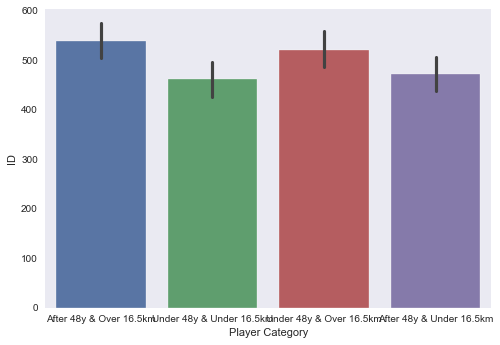

In [185]:
sns.barplot(x="Player Category", y="ID", data=players_clean)